# 线性回归模型预测

In [23]:
#导入库
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt

In [24]:
#创建数据集--------使用线性模型参数：w=[2.-3.4],b=4.2和噪声生成数据集以及标签
def synthetic_data(w,b,num_examples):
    #特征矩阵
    X = torch.normal(0,1,(num_examples, len(w)))
    #标签向量
    y = torch.matmul(X,w) + b
    #加噪声
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

features:  tensor([0.2846, 2.3852]) 
labels:  tensor([-3.3412])


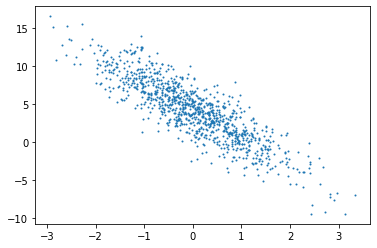

In [25]:
#观察数据集
print('features: ',features[0],'\nlabels: ',labels[0])
plt.scatter(features[:,1].detach(), labels.detach(),1)

In [26]:
#定义data_iter函数：接受批量大小，特征矩阵，标签向量，生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    #获得总样本数
    num_examples = len(features)
    #打上序号
    indices = list(range(num_examples))
    #对序号随机打乱
    random.shuffle(indices)
    #每隔一个小批量取一个i
    for i in range(0,num_examples, batch_size):
        #获取每个小批量的编号列表
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        #生成器，起到存档点的作用，下次调用接着往下进行
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
#试试看我们的小批量特征矩阵以及标签向量生成咋样
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n',y)
    break
    

tensor([[ 0.3470,  0.1299],
        [ 0.3838, -0.2670],
        [-1.0813,  0.5490],
        [ 1.8561, -0.5022],
        [ 0.4631,  0.8167],
        [-0.4712, -0.4957],
        [ 0.3066,  0.3428],
        [ 1.0109, -1.5206],
        [ 0.2111,  0.5237],
        [-1.0796, -0.2357]]) 
 tensor([[ 4.4458],
        [ 5.8886],
        [ 0.1750],
        [ 9.6358],
        [ 2.3602],
        [ 4.9434],
        [ 3.6620],
        [11.3853],
        [ 2.8316],
        [ 2.8310]])


In [39]:
#开始定义

#定义模型
#线性回归模型
def linreg(X,w,b):
    return torch.matmul(X, w) + b

#定义损失函数
#均方损失函数
def squared_loss(y_hat,y):
    return(y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr* param.grad / batch_size
            param.grad.zero_()
    

In [61]:
# 开始训练过程
#定义初始化模型参数
w = torch.normal(0, 0.01,size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad = True)

#学习率不能太大也不能太小
lr = 0.03
#扫几遍
num_epochs = 3
#用的模型
net = linreg
#用的损失函数
loss = squared_loss

for epoch in range(num_epochs):
    # 对每个小批量进行预测以及损失的计算，优化参数
    for X,y in data_iter(batch_size,features,labels):
        ## 先用net预测一个结果，然后计算损失(小批量)
        l = loss(net(X,w,b),y)
        ## l的形状是一个（batch_size，1）而不是一个标量
        #因此需要相加并计算梯度
        l.sum().backward()
        ## 然后优化更新参数
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        #print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        print('【epoch {}】, loss {:f}'.format(epoch+1, train_l.mean()))
        print('w:',w,'\nb:',b)

# 比较一下下
print('w的估计误差： {}'.format(true_w - w.reshape(true_w.shape)))
print('b的估计误差： {}'.format(true_b - b))

【epoch 1】, loss 0.032615
w: tensor([[ 1.9283],
        [-3.2606]], requires_grad=True) 
b: tensor([4.0016], requires_grad=True)
【epoch 2】, loss 0.000116
w: tensor([[ 1.9976],
        [-3.3941]], requires_grad=True) 
b: tensor([4.1907], requires_grad=True)
【epoch 3】, loss 0.000050
w: tensor([[ 1.9992],
        [-3.4003]], requires_grad=True) 
b: tensor([4.1999], requires_grad=True)
w的估计误差： tensor([0.0008, 0.0003], grad_fn=<SubBackward0>)
b的估计误差： tensor([9.8705e-05], grad_fn=<RsubBackward1>)
